In [49]:
import os
import sqlite3
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from tqdm import tqdm
import pickle as pkl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from userinfo import YOUR_NAME, START_DAY, END_DAY

%matplotlib inline
"""GOALS"""
# Cumulative Messaging per person
# Number of people messaged per day
# Total Sent/Received

'GOALS'

In [50]:
print(YOUR_NAME, START_DAY, END_DAY)
Num_People_To_Graph = 10
# START_DAY = "8/20/16"
# END_DAY = "6/1/18"

Armaan Sethi 1/1/18 6/1/18


In [51]:
convos = pkl.load(open("messages.pkl", 'rb'))
#0: id (string)
#1: name (string)
#2: num_messages (dict name:num_messages)
#3: datetime (list of datetime objs)
#4: text (list of messages)
#5: who (list of names)
#6: group (bool)
print("Total Conversations: ", len(convos), "\n")

Total Conversations:  676 



In [52]:
start_day = datetime.strptime(START_DAY, "%m/%d/%y")
end_day = datetime.strptime(END_DAY, "%m/%d/%y")
num_days = (end_day - start_day).days
num_days

151

In [53]:
df_mpd = pd.DataFrame()
date_list = [start_day.date() + timedelta(days=x) for x in range(0, num_days+1)]

for i in range(len(convos)):
    messages_per_day = []
    if(convos[i][6] == False):# not group chat
        num_messages = len(convos[i][3]) 
        
        total_messages = 0
        prev_total_messages = 0
        for day in date_list:
            while(total_messages < num_messages and convos[i][3][num_messages - total_messages - 1].date() < day):
                total_messages+=1 #messages until day
                
            messages_per_day.append(total_messages - prev_total_messages) #num messages per day
            prev_total_messages = total_messages #update total

        if(sum(messages_per_day[1:]) > 0): #no need to add columns with no messages
            df_mpd[convos[i][1]] = messages_per_day[1:]

df_mpd.index = date_list[:-1]
df_mpd = df_mpd.reindex(sorted(df_mpd.columns), axis=1) #sort alphabetically, later sort by total messages
df_mpd.head()#messages per day

,Abhay Donthi,Akaash Sanyal,Akash Jain,Akshay Sankar,Alec Mikell,Alyes Chen,Aman Dalal,Amogh Natu,Amogh Sharma,Ani Sankaran,...,Vignesh Balasubramaniam,Vikas Vannappagari,Vikram Aikat,Vinit Ranjan,Visrut Sudhakar,Wayne Ji,Xueyang Li,Yicheng Wang,Yingzhuo Li,Zohair Zia
2018-01-01,0,0,1,0,0,0,0,0,0,9,...,0,0,0,0,0,0,2,10,0,0
2018-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,0,0,0,0,0,0,0,0,0,1,...,0,0,0,27,0,0,1,85,0,0
2018-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,280,0,0
2018-01-05,0,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0


In [54]:
%matplotlib notebook
%matplotlib notebook

In [55]:
#sort by total num messages
df_mpd = df_mpd[df_mpd.sum().sort_values(ascending = False).index]
df_mpd.head()

,Mohamed Lansari,Alec Mikell,Vamsi Varanasi,August Ning,Yicheng Wang,Danielle du Preez,Shreya Patel,Nikhil Komirisetti,Anna Hattle,Harshal Singh,...,Danila Chenchik,Ethan Holland,Rashmi Patwardhan,Brian Rhee,Esther Lee,Caroline Wang,Cassidy Soutter,Nikhil Kaul,Joe Choo-Choy,Julie Son
2018-01-01,0,0,2,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-02,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,10,0,49,0,85,6,0,0,0,38,...,0,0,0,0,0,0,0,0,0,0
2018-01-04,0,0,33,6,280,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-05,0,0,22,0,0,2,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#messages per person per day
df_mpp_pd = df_mpd.copy().cumsum(axis=0)
df_mpp_pd = df_mpp_pd.iloc[:,:Num_People_To_Graph]
df_mpp_pd.head()

,Mohamed Lansari,Alec Mikell,Vamsi Varanasi,August Ning,Yicheng Wang,Danielle du Preez,Shreya Patel,Nikhil Komirisetti,Anna Hattle,Harshal Singh
2018-01-01,0,0,2,0,10,0,0,0,0,0
2018-01-02,0,0,12,0,10,0,0,0,0,0
2018-01-03,10,0,61,0,95,6,0,0,0,38
2018-01-04,10,0,94,6,375,6,0,0,0,38
2018-01-05,10,0,116,6,375,8,0,0,0,42


<IPython.core.display.Javascript object>


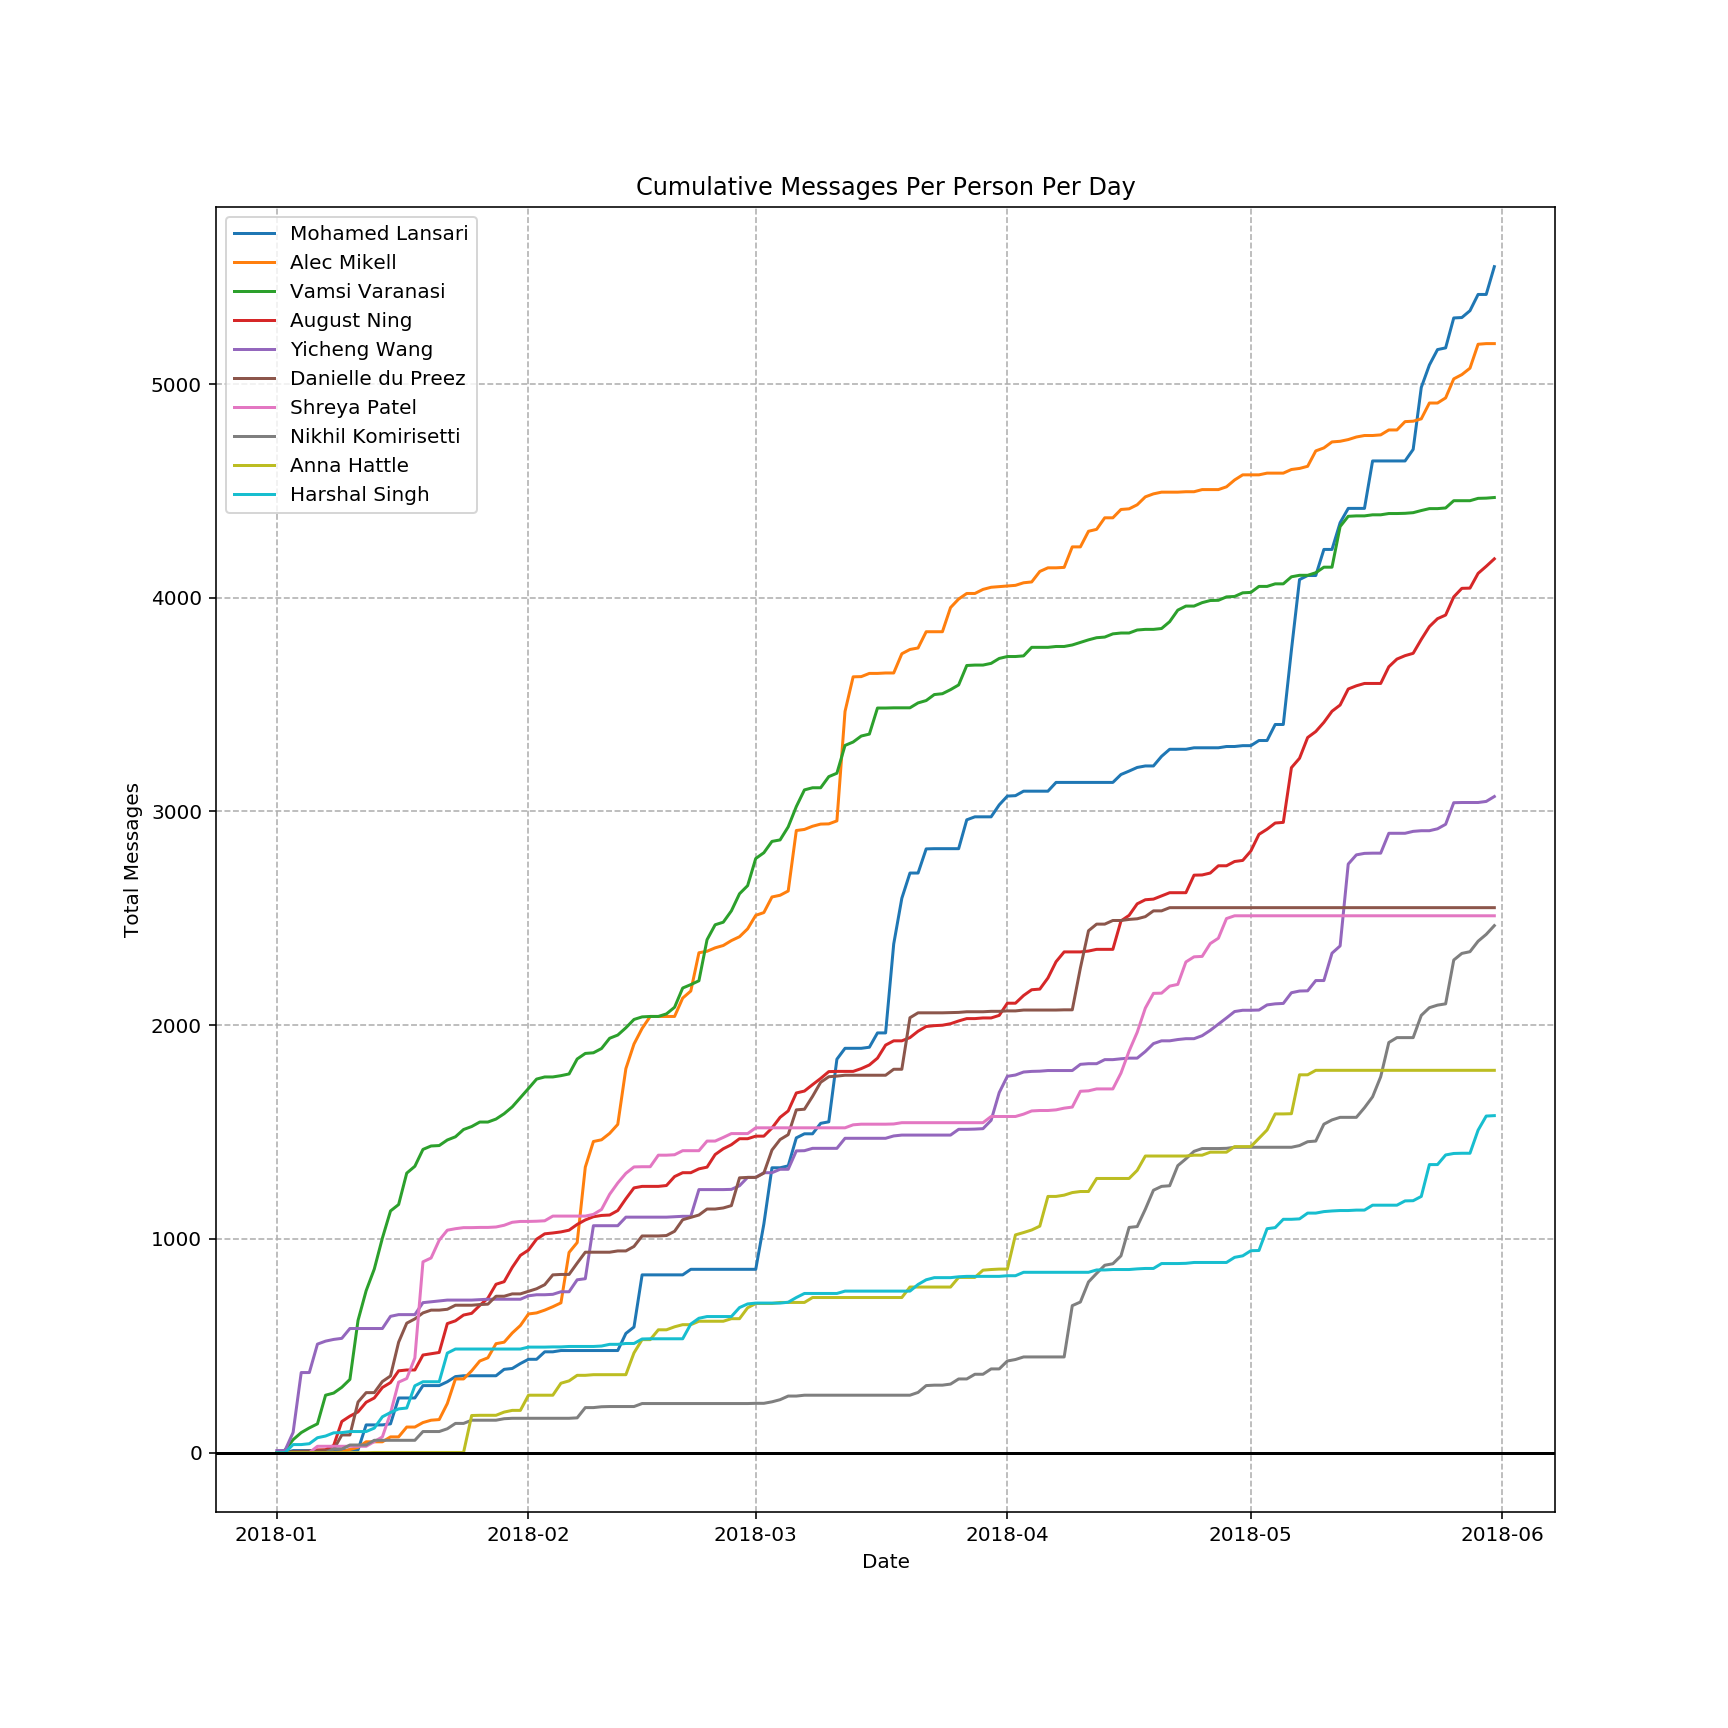

In [57]:
# plt_mpp_pd = plt.figure()

plt_mpp_pd = df_mpp_pd.plot(title = "Cumulative Messages Per Person Per Day", figsize=(15,15))
plt_mpp_pd.set_ylabel("Total Messages")
plt_mpp_pd.set_xlabel("Date")
plt_mpp_pd.grid(True, linestyle='--')
plt_mpp_pd.axhline(y=0, color='k')

plt_mpp_pd.get_figure().savefig("graphs/cumulative_messaging_by_day.png", bbox_inches='tight')


In [58]:
#total messages per day
df_tm_pd = df_mpd.iloc[:].sum(axis = 1)
df_tm_pd.head()

2018-01-01     32
2018-01-02     28
2018-01-03    234
2018-01-04    342
2018-01-05     79
dtype: int64

<IPython.core.display.Javascript object>


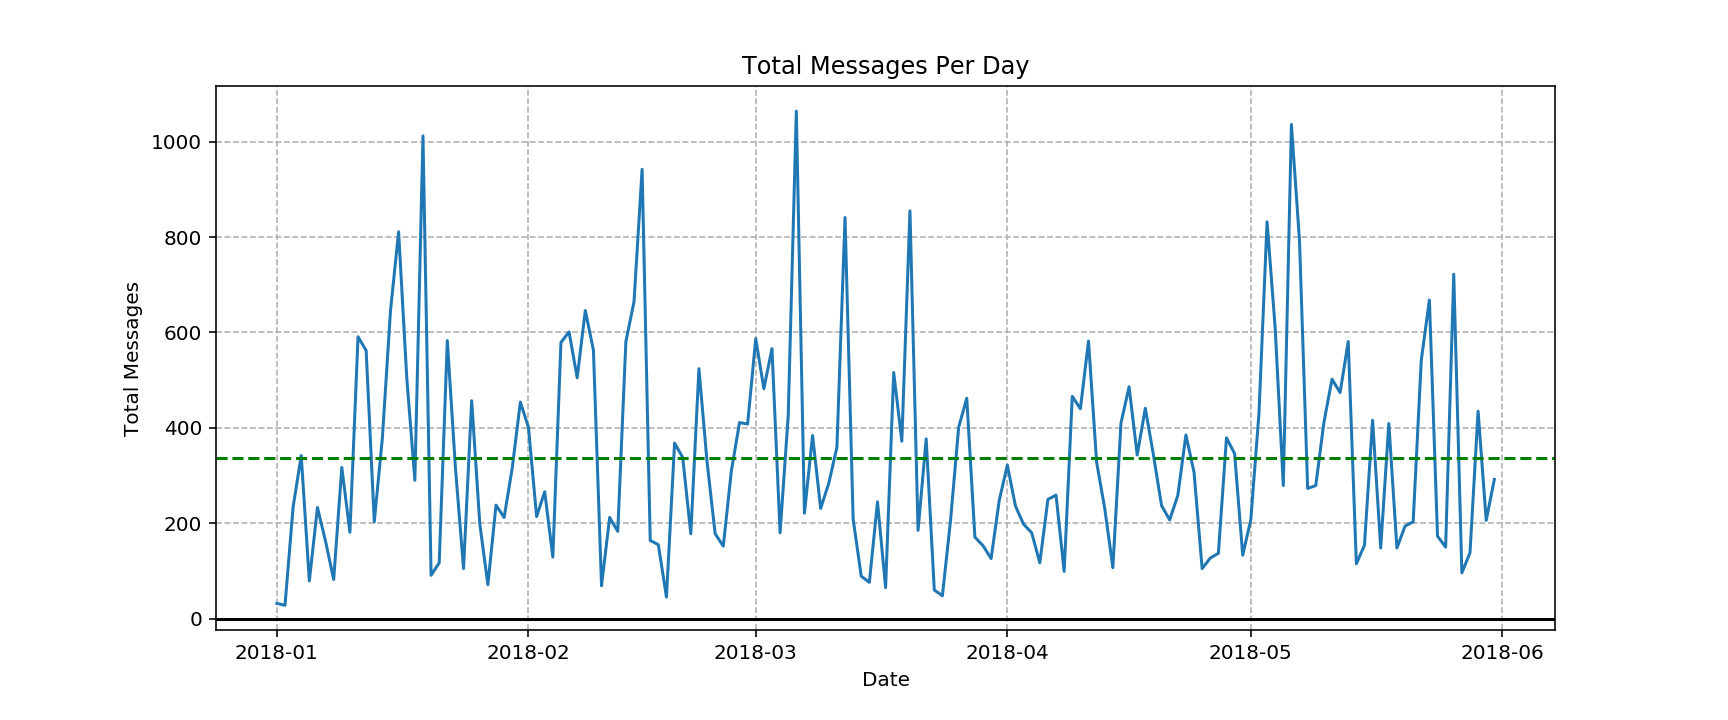

In [59]:
import matplotlib.dates as mdates

plt_tm_pd = plt.figure()

plt_tm_pd = df_tm_pd.plot(title = "Total Messages Per Day", figsize=(20,5))
plt_tm_pd.set_ylabel("Total Messages")
plt_tm_pd.set_xlabel("Date")
plt_tm_pd.grid(True, linestyle='--')
plt_tm_pd.axhline(y=0, color='k')
plt_tm_pd.axhline(y=np.mean(df_tm_pd), color='g', linestyle='--')

plt_tm_pd.get_figure().savefig("graphs/total_messages_per_day.png", bbox_inches='tight')


In [60]:
#num people messaged per day
df_ppl_pd = (df_mpd != 0).astype(int).sum(axis = 1)
df_ppl_pd.head()

2018-01-01     7
2018-01-02     3
2018-01-03    12
2018-01-04     7
2018-01-05     7
dtype: int64

<IPython.core.display.Javascript object>


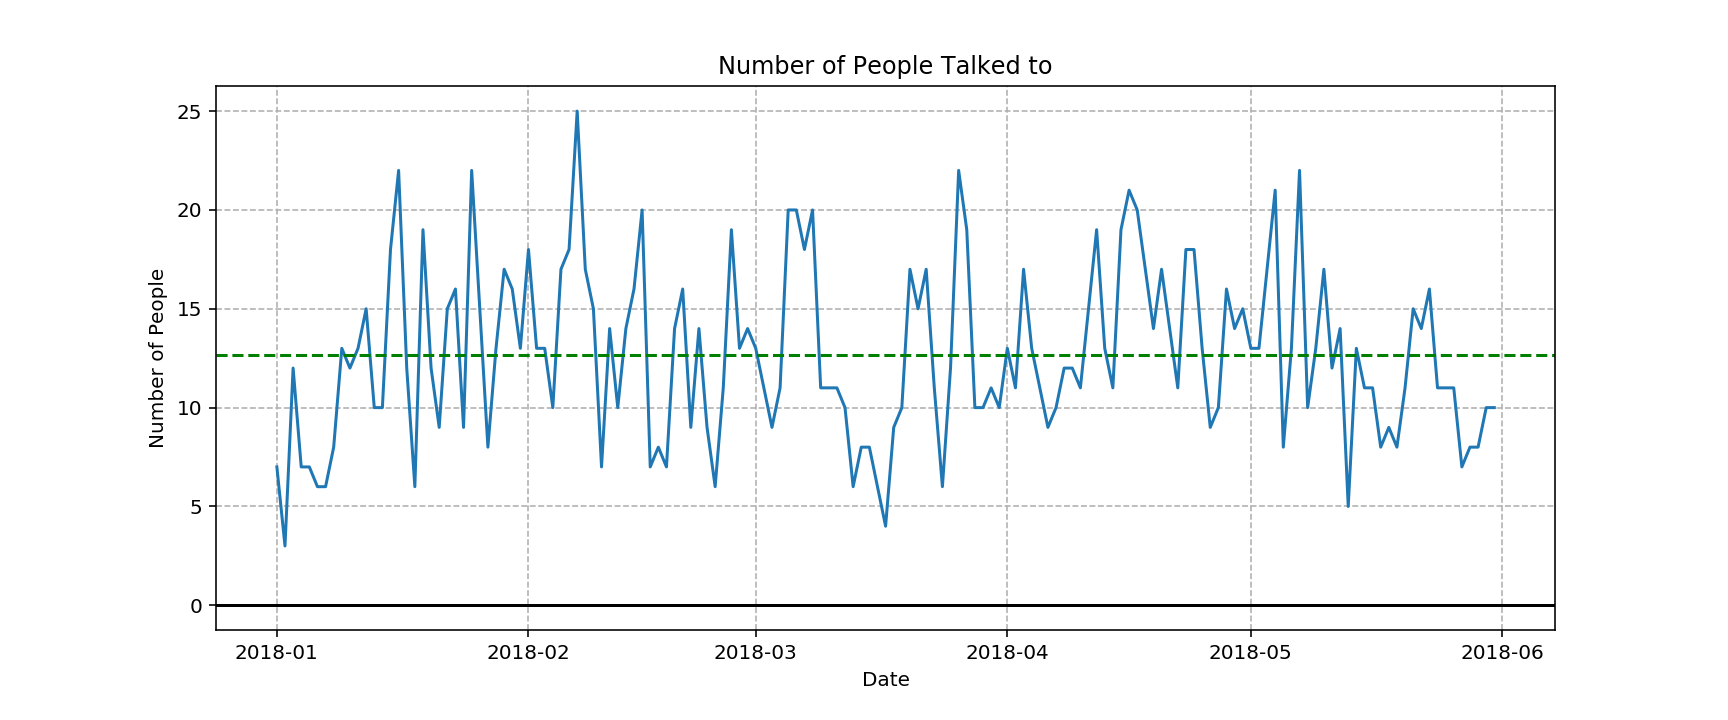

In [61]:
plt_ppl_pd = plt.figure()

plt_ppl_pd = df_ppl_pd.plot(title = "Number of People Talked to", figsize=(20,5))
plt_ppl_pd.set_ylabel("Number of People")
plt_ppl_pd.set_xlabel("Date")
plt_ppl_pd.grid(True, linestyle='--')
plt_ppl_pd.axhline(y=0, color='k')
plt_ppl_pd.axhline(y=np.mean(df_ppl_pd), color='g', linestyle = '--')

plt_ppl_pd.get_figure().savefig("graphs/num_people_talked_per_day.png", bbox_inches='tight')


In [ ]:
#Made by your boy Armaan, if you got any cool ideas hit him up...or Fork/Pull Request --> you know the deal